In [1]:
import numpy as np
import pandas as pd
import PIL as pl
import cv2 as cv
import pytesseract as ts
import matplotlib as plt

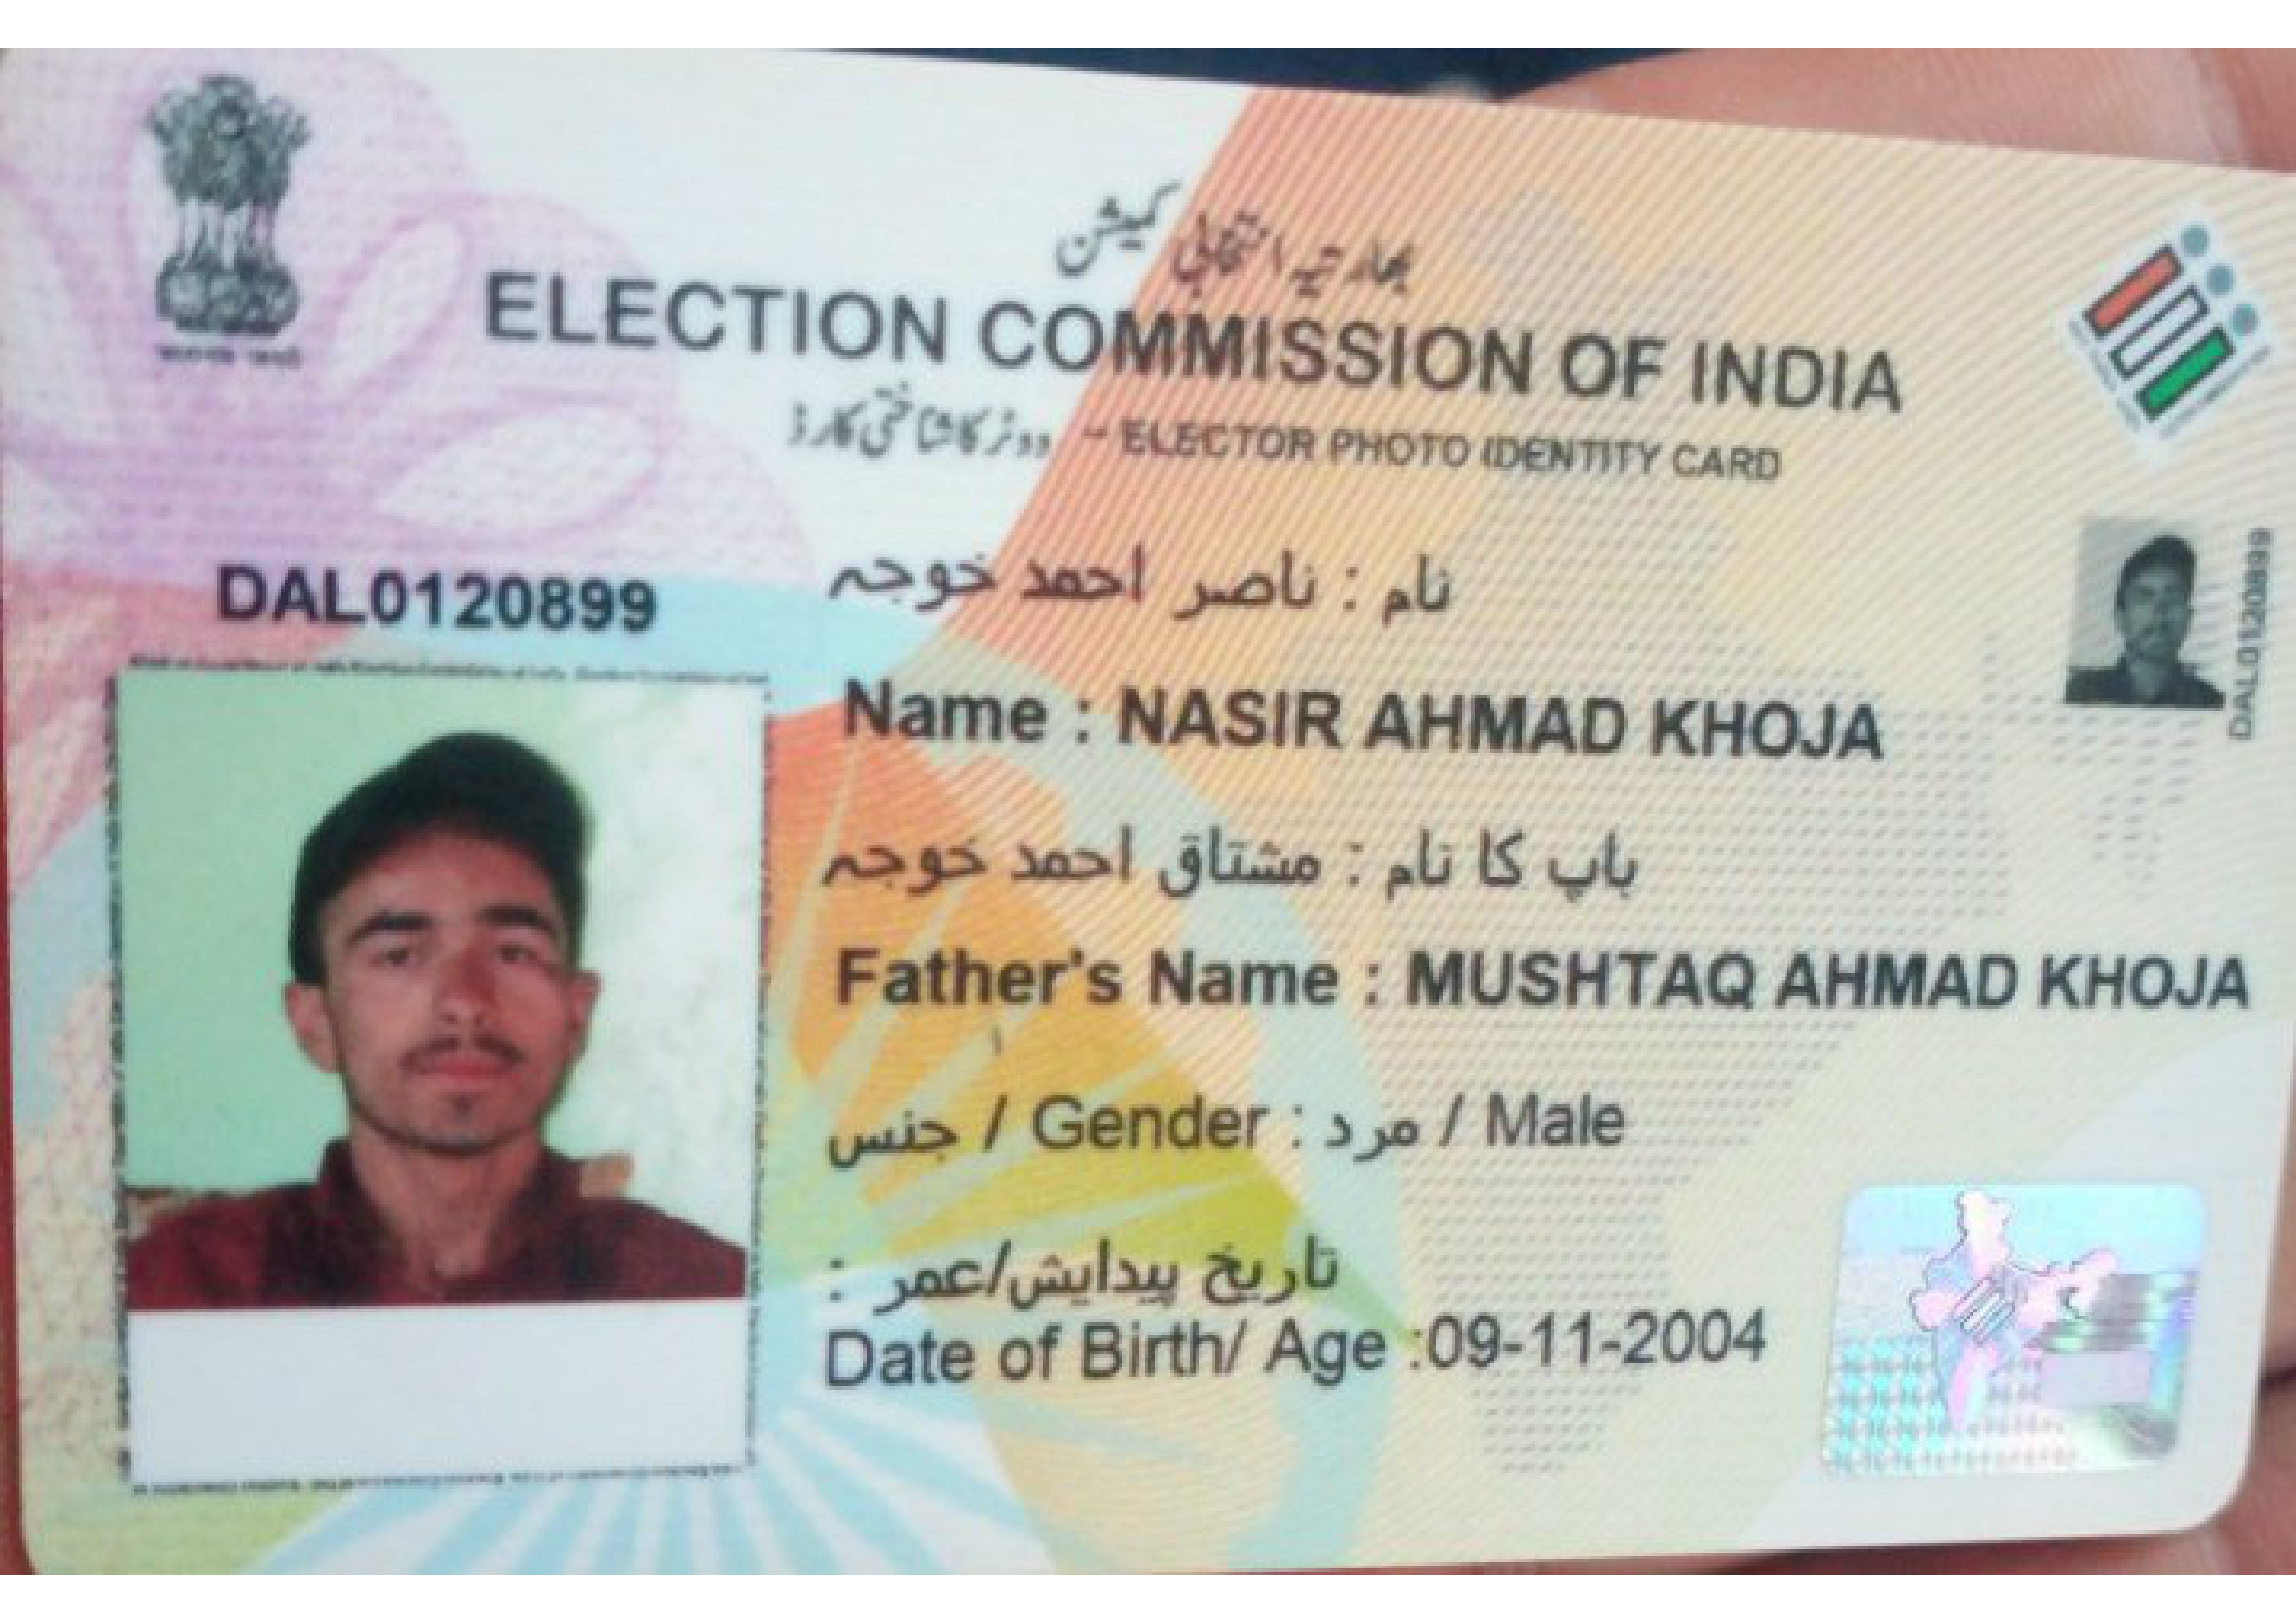

In [2]:
img_pl = pl.Image.open('images/6005121460_6_page_1.png')
img_pl

In [3]:
img_cv = cv.imread('images/6005121460_6_page_1.png')  
cv.imshow('Identity Card', img_cv)
cv.waitKey(5000)  # Wait for 5 seconds
cv.destroyAllWindows()
print(type(img_cv)) 

<class 'numpy.ndarray'>


In [4]:
print(type(img_pl))  



<class 'PIL.PngImagePlugin.PngImageFile'>


In [5]:
text_pl = ts.image_to_string(img_pl)
print(text_pl)

F P
/7;?--

ELECTION 05 il ’,, St
,w’u /"f’f"’"}"‘f’ DN OF INDIA

”{r A.HMDKHGJA
d'-'-‘-'ﬂ'rl"svb

-_ me : MUSHTAQ AHMAD KHOJA
- ' 3,0 / Male




In [6]:
data = ts.image_to_data(img_pl)

In [8]:
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))

In [9]:
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      77 non-null     object
 1   page_num   76 non-null     object
 2   block_num  76 non-null     object
 3   par_num    76 non-null     object
 4   line_num   76 non-null     object
 5   word_num   76 non-null     object
 6   left       76 non-null     object
 7   top        76 non-null     object
 8   width      76 non-null     object
 9   height     76 non-null     object
 10  conf       76 non-null     object
 11  text       76 non-null     object
dtypes: object(12)
memory usage: 7.3+ KB


In [11]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,3508,2481,-1,
1,2,1,1,0,0,0,1516,70,936,290,-1,
2,3,1,1,1,0,0,1516,70,936,290,-1,
3,4,1,1,1,1,0,1516,70,936,290,-1,
4,5,1,1,1,1,1,1516,70,936,290,95.000000,
5,2,1,2,0,0,0,2111,163,278,146,-1,
6,3,1,2,1,0,0,2140,163,205,136,-1,
7,4,1,2,1,1,0,2146,163,146,42,-1,
8,5,1,2,1,1,1,2146,163,11,42,42.824055,F
9,5,1,2,1,1,2,2243,177,49,19,0.000000,P


In [12]:
# Drop empty values and rows
df.dropna(inplace=True)

# Define columns with number values
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']

# Round the 'conf' column to handle floating-point values
df['conf'] = df['conf'].astype(float).round()

# Change all columns with number values to type int
df[col_int] = df[col_int].astype(int)

# Verify the changes
print(df.dtypes)


level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object


In [15]:
image = img_cv.copy()
level = 'word'

for l,x,y,w,h,c,t in df[['level','left','top','width','height','conf','text']].values:
    if level == 'page' and l == 1:
        cv.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
    elif level == 'block' and l == 2:
        cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),1)
    elif level == 'paragraph' and l == 3:
        cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
    elif level == 'line' and l == 4:
        cv.rectangle(image,(x,y),(x+w,y+h),(255,0,51),1)
    elif level == 'word' and l == 5:
        cv.rectangle(image,(x,y),(x+w,y+h),(0,0,255),1)
        cv.putText(image,t,(x,y),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(255,255,255),1)

# Save the image with bounding boxes
cv.imwrite("../Bounding_Box/output_with_bounding_boxes.png", image)

# Optionally, you can still display the image
cv.imshow("bounding box",image)
cv.waitKey(5000)  # Wait until a key is pressed
cv.destroyAllWindows()